In [316]:
import pypsa, numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import highspy

Several Eastern Caribbean countries with no storage and no links, one year of hourly periods, with varying loads and generation from VRE 


In [317]:
#choose the working folders for reading in data and for saving output and figures
csv_folder_name =  "Eastern_CaribbeanExtendable/"
network = pypsa.Network(csv_folder_name)
scenario = "Extendable_quarter-wind-solar-cap/"

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network Eastern_CaribbeanExtendable has buses, generators, loads


In [318]:
#specify use of linopy and solver of choice

network.optimize(solver_name="highs")



Index(['SaintKittsNevis', 'Antigua', 'Guadeloupe', 'Montserrat', 'Dominica',
       'Martinique', 'SaintLucia', 'Barbados', 'SaintVincentGrenadines',
       'Grenada'],
      dtype='object', name='Bus')
Index(['SaintKittsNevis', 'Antigua', 'Guadeloupe', 'Montserrat', 'Dominica',
       'Martinique', 'SaintLucia', 'Barbados', 'SaintVincentGrenadines',
       'Grenada'],
      dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]
INFO:linopy.io: Writing time: 29.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 403007 primals, 893602 duals
Objective: 8.27e+08
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper were not assigned to the network.


('ok', 'optimal')

In [319]:
#specify folder for saving results, plots
pypsa.Network.export_to_csv_folder(network,scenario)

INFO:pypsa.io:Exported network '<unnamed>' contains: generators, buses, loads


<Axes: xlabel='snapshot'>

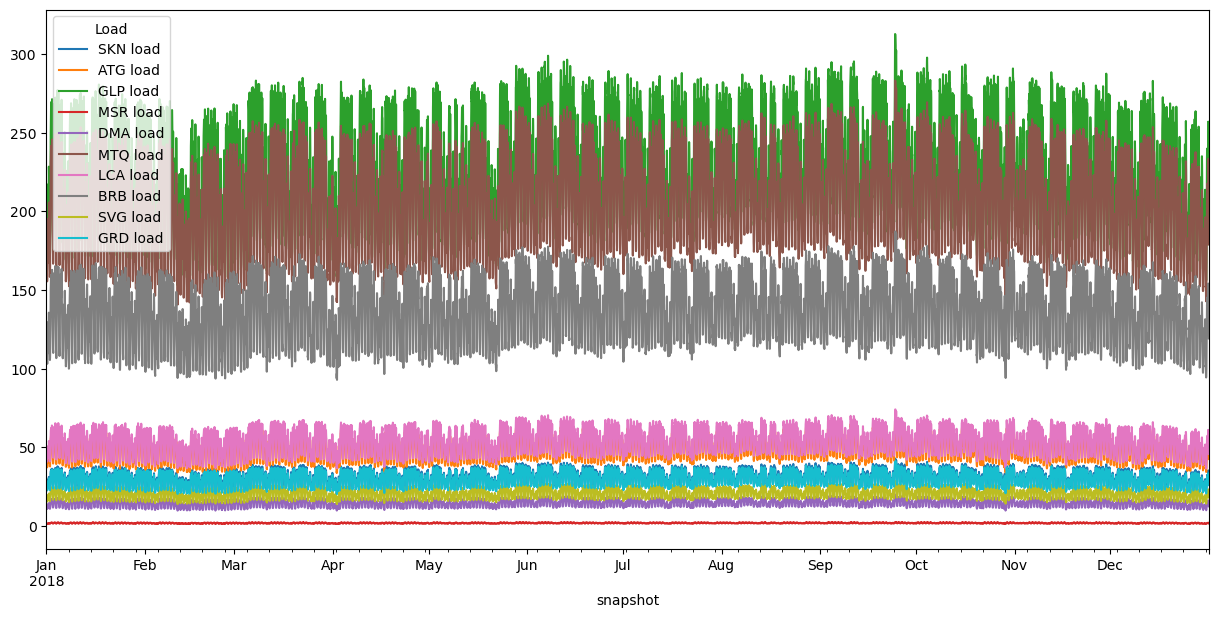

In [320]:
#print the load active power (P) consumption
network.loads_t.p.plot(figsize = (15,7))

Generator
SKN diesel         14.878027
SKN solar pv        8.675649
SKN wind            6.568500
SKN geothermal     27.002192
ATG diesel         62.970000
ATG wind           25.000000
ATG solar pv       44.530178
MSR diesel          1.091280
MSR geothermal      1.500000
MSR solar pv        1.000000
MSR wind            0.159483
GLP diesel        214.600000
GLP coal           -0.000000
GLP hydro          15.000000
GLP geothermal     50.000000
GLP wind          150.000000
GLP solar pv       95.652174
GLP biomass        10.000000
DMA diesel         -0.000000
DMA hydro           6.600000
DMA wind           -0.000000
DMA solar pv       -0.000000
DMA geothermal     15.000000
MTQ diesel        168.700000
MTQ wind          100.000000
MTQ solar pv      135.329861
MTQ biomass        41.400000
MTQ geothermal     50.000000
LCA diesel         41.370048
LCA wind           25.026767
LCA solar pv       16.999887
LCA geothermal     30.000000
BRB diesel        162.320000
BRB solar pv      142.000000
BRB 

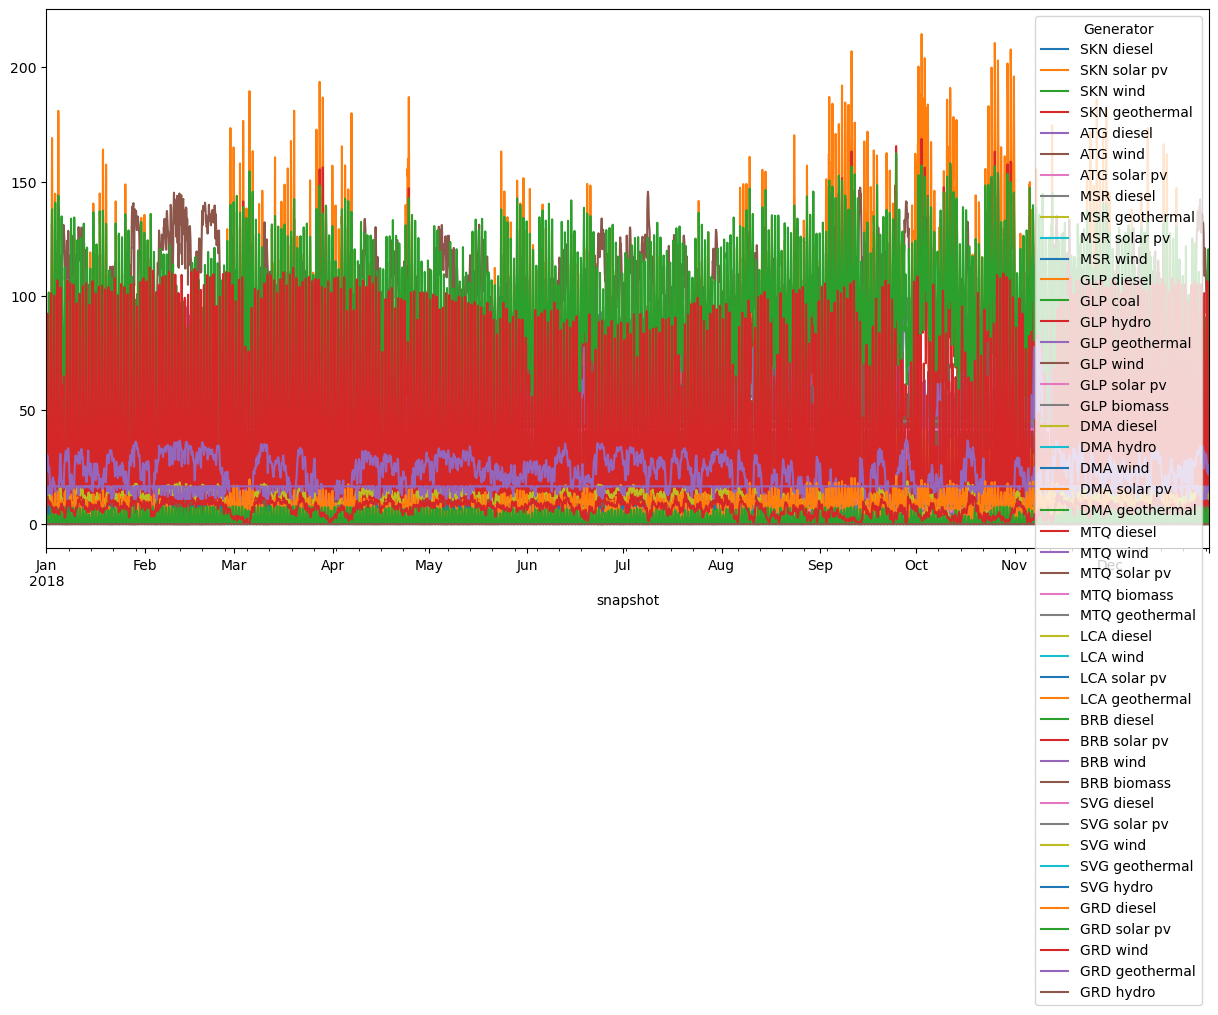

In [321]:
#print the generator active power (P) dispatch
network.generators_t.p.plot(figsize = (15,7))
network.generators.p_nom_opt

In [322]:
#start manipulation of results for capacities
df_cap=pd.DataFrame(network.generators.p_nom_opt)
df_cap = df_cap.reset_index()

In [323]:
#reshape dataframe for output capacities
df_cap.columns = ['name','Capacity']
new = df_cap["name"].str.split(" ", n = 1, expand = True)
df_cap["Technology"]= new[1]
df_cap['Country']= new[0]
df_cap.drop(columns =["name"], inplace = True)
df_cap= df_cap.pivot(index = 'Country',columns = 'Technology', values = 'Capacity')
df_cap

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,62.970000,NaN,NaN,44.530178,25.000000
BRB,10.0,NaN,162.320000,NaN,NaN,142.000000,38.000000
DMA,NaN,NaN,-0.000000,15.000000,6.6,-0.000000,-0.000000
GLP,10.0,-0.0,214.600000,50.000000,15.0,95.652174,150.000000
GRD,NaN,NaN,21.092327,18.319054,-0.0,9.951496,12.659537
LCA,NaN,NaN,41.370048,30.000000,NaN,16.999887,25.026767
MSR,NaN,NaN,1.091280,1.500000,NaN,1.000000,0.159483
MTQ,41.4,NaN,168.700000,50.000000,NaN,135.329861,100.000000
SKN,NaN,NaN,14.878027,27.002192,NaN,8.675649,6.568500


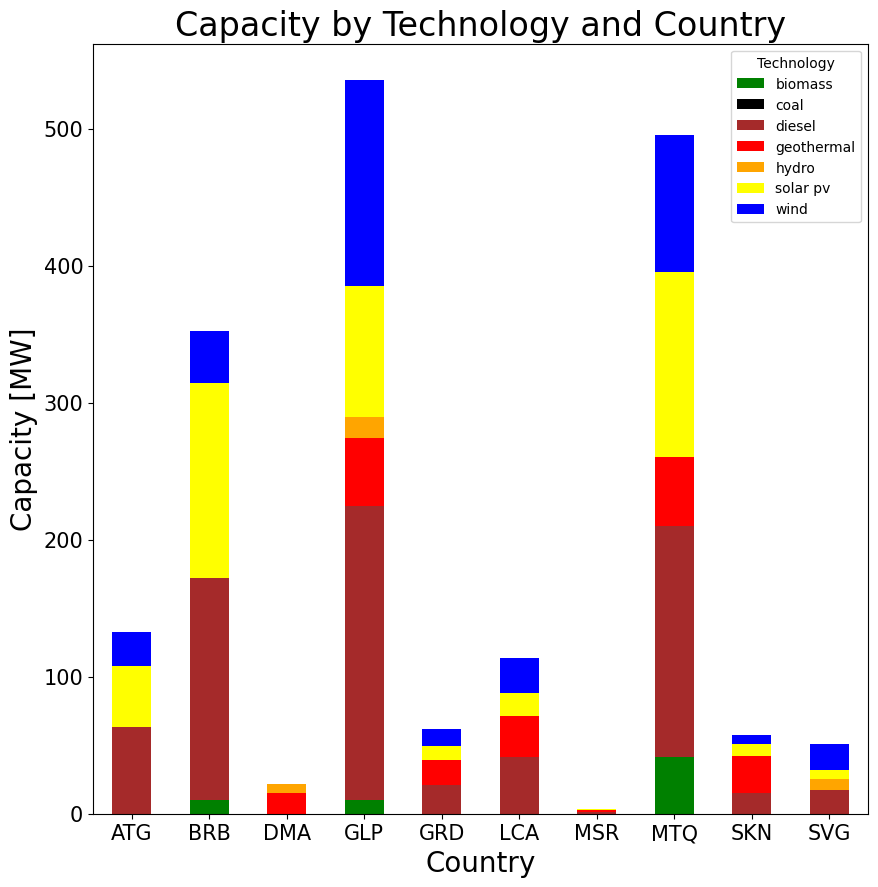

In [324]:
#plot capacities by country and technology
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Capacity [MW]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
fig.savefig(scenario+"capacity.png", bbox_inches='tight')  

In [325]:
#scale capacities to the maximum for each country
df_cap_scaled = df_cap.div(df_cap.sum(axis=1), axis=0)*100
df_cap_scaled

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,47.524464,NaN,NaN,33.607637,18.867899
BRB,2.838329,NaN,46.071753,NaN,NaN,40.304269,10.785649
DMA,NaN,NaN,-0.000000,69.444444,30.555556,-0.000000,-0.000000
GLP,1.868278,-0.0,40.093251,9.341391,2.802417,17.870488,28.024174
GRD,NaN,NaN,34.007588,29.536184,-0.000000,16.044999,20.411228
LCA,NaN,NaN,36.482585,26.455796,NaN,14.991518,22.070101
MSR,NaN,NaN,29.094885,39.991864,NaN,26.661242,4.252008
MTQ,8.356380,NaN,34.051238,10.092246,NaN,27.315645,20.184492
SKN,NaN,NaN,26.044975,47.269130,NaN,15.187299,11.498596


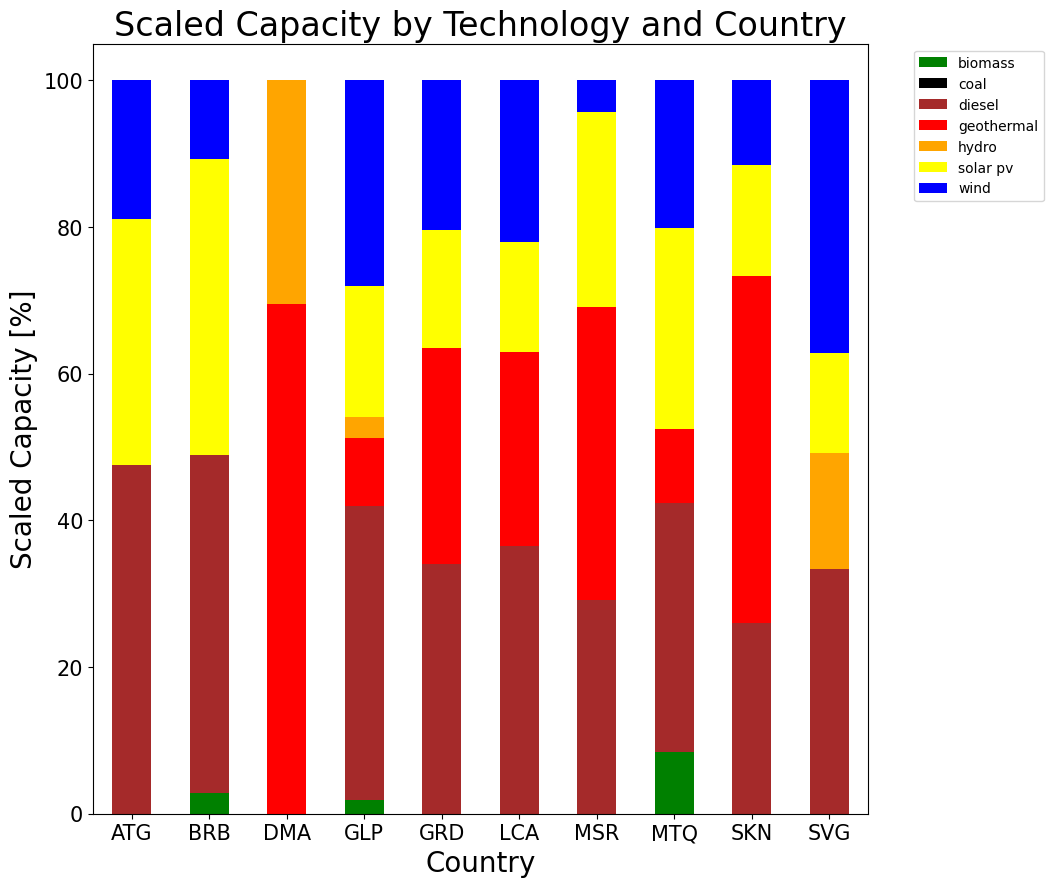

In [326]:
#plot the scaled capacities
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Capacity [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_capacity.png", bbox_inches='tight') 

In [327]:
#check total capital costs for generators
#(network.generators.p_nom_opt*network.generators.capital_cost)

In [328]:
#calculate total operating plus capital costs; reshape output dataframe for costs by country and technology
df_cost=pd.DataFrame((network.generators.p_nom_opt*network.generators.capital_cost)+(network.generators_t.p.sum()* network.generators.marginal_cost))
df_cost.columns = ['cost']
df_cost = df_cost.reset_index()
#df_cost

In [329]:
#reshape output dataframe for costs by country and technology
new1 = df_cost["Generator"].str.split(" ", n = 1, expand = True)
df_cost["Technology"]= new[1]
df_cost['Country']= new[0]
df_cost
df_cost.drop(columns =["Generator"], inplace = True)
df_cost= df_cost.pivot(index = 'Country',columns = 'Technology', values = 'cost')
#df_cost

In [330]:
#calculate total generator costs by country
df_cost.sum(axis=1)

Country
ATG    6.741758e+07
BRB    1.974252e+08
DMA    1.422428e+07
GLP    2.366098e+08
GRD    3.146339e+07
LCA    5.614467e+07
MSR    2.118016e+06
MTQ    2.309567e+08
SKN    3.337969e+07
SVG    1.200321e+07
dtype: float64

In [331]:
#sum up generator costs by country and technology
#network.generators_t.p.sum()

In [332]:
#sum total generator costs
network.generators_t.p.sum().sum()

6799810.609999999

In [333]:
#reshape dataframe for actual generation by country and technology (in GWh)
df_gen=pd.DataFrame(network.generators_t.p.sum()/1000)
df_gen = df_gen.reset_index()
df_gen.columns = ['name','Electricity']
new = df_gen["name"].str.split(" ", n = 1, expand = True)
df_gen["Technology"]= new[1]
df_gen['Country']= new[0]
df_gen.drop(columns =["name"], inplace = True)
df_gen= df_gen.pivot(index = 'Country',columns = 'Technology', values = 'Electricity')

In [334]:
#display dataframe for actual generation by country and technology (in GWh)
df_gen

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,246.538614,NaN,NaN,78.917462,111.559964
BRB,86.458586,NaN,676.586712,NaN,NaN,250.667514,188.209288
DMA,NaN,NaN,0.000000,82.737200,44.743700,0.000000,0.000000
GLP,79.807239,0.0,553.082337,387.663204,128.147037,169.603377,684.867006
GRD,NaN,NaN,45.268473,140.520006,0.000000,17.093372,61.136850
LCA,NaN,NaN,88.268638,230.600538,NaN,30.020490,124.549734
MSR,NaN,NaN,2.348794,11.556343,NaN,1.775358,0.710024
MTQ,330.949495,NaN,363.675497,391.597593,NaN,239.984156,494.866558
SKN,NaN,NaN,25.726569,203.630755,NaN,15.361233,28.464292


In [335]:
#calculate LCOE for each country separately
df_cost.sum(axis=1)/df_gen.sum(axis=1)/1000

Country
ATG    154.267968
BRB    164.257920
DMA    111.579703
GLP    118.117688
GRD    119.171080
LCA    118.588928
MSR    129.222010
MTQ    126.824483
SKN    122.188099
SVG     65.909488
dtype: float64

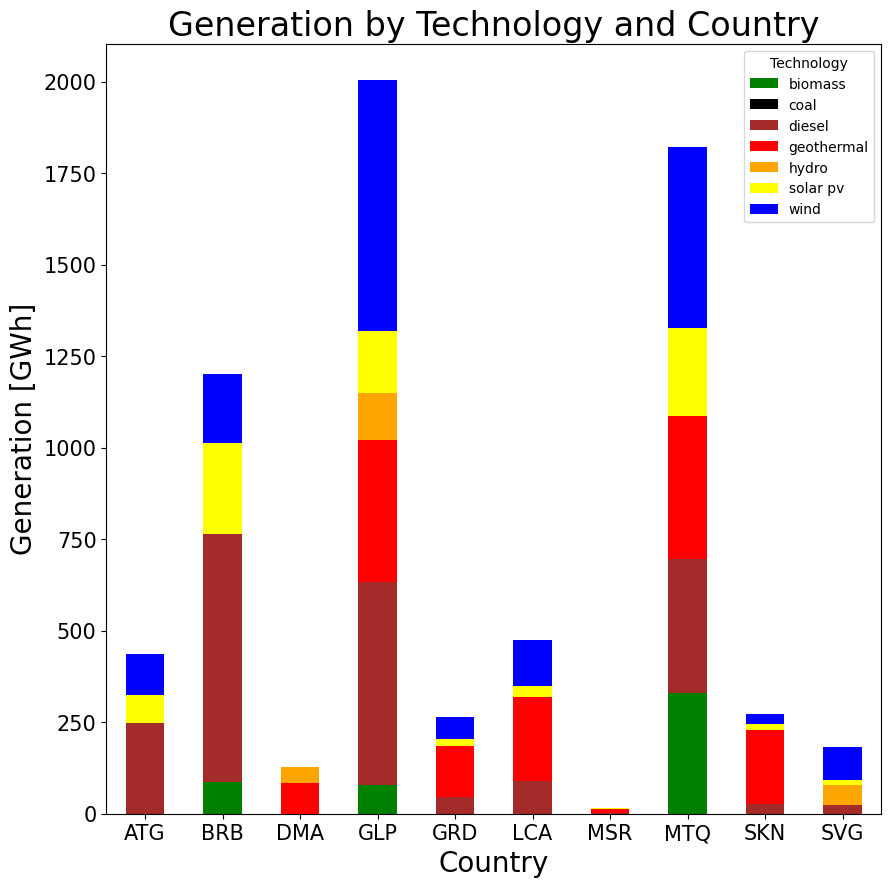

In [336]:
#plot generation (GWh) by technology and country; save output plot

fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Generation [GWh]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
fig.savefig(scenario+"generation.png", bbox_inches='tight') 

In [337]:
#scaled the generation output by country and technology
df_gen_scaled = df_gen.div(df_gen.sum(axis=1), axis=0)*100

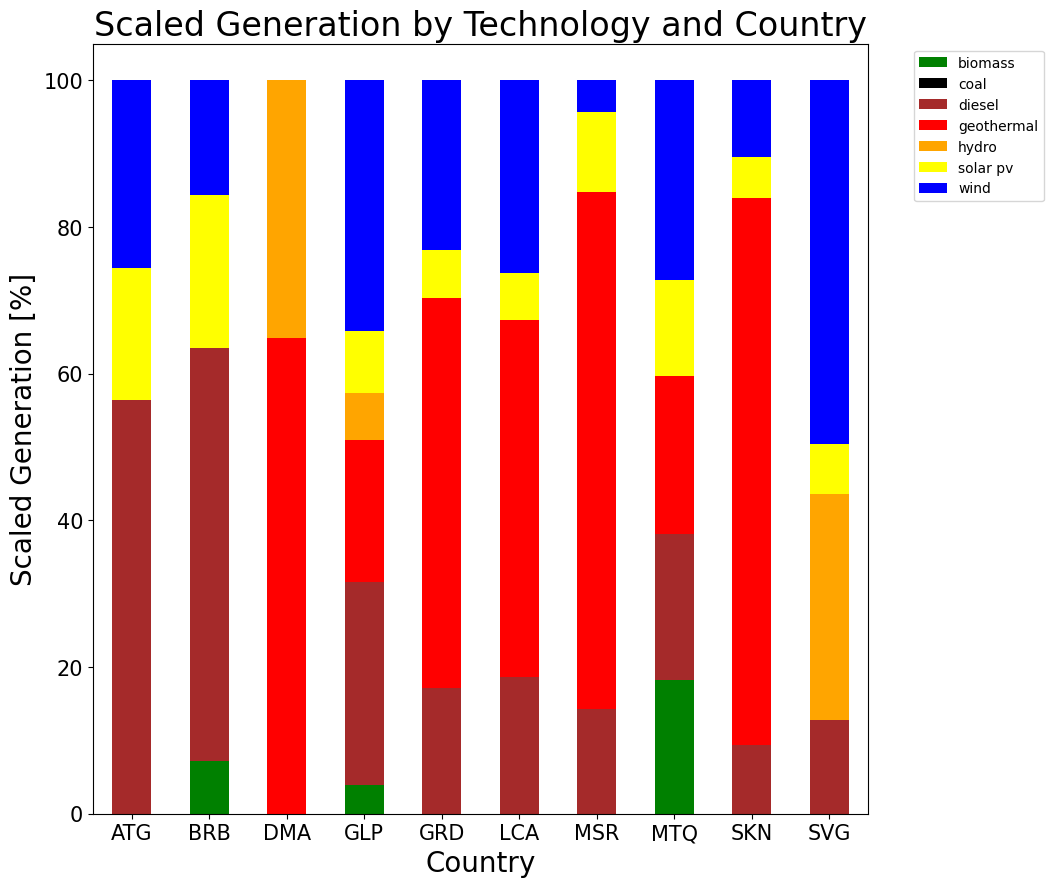

In [338]:
#plot the scaled output by technology and country

fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Generation [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_generation.png", bbox_inches='tight') 

In [339]:
#calculate capacity factors by country and technology
#network.generators_t.p.sum()/(network.generators.p_nom_opt*8760)

In [340]:
#sum up total diesel (fossil fuel) generation
diesel_total = df_gen.diesel.sum()
diesel_total

2024.695241147045

In [341]:
#calculate carbon cost per MWh (only diesel as fossil fuel)
carbon_price = 50 #USD/tonneCO2
carbon_intensity = 0.63 #tonneCO2/MWh
carbon_price*carbon_intensity #USD/MWh

31.5

In [342]:
#calculate the total carbon cost
carbon_cost = diesel_total*carbon_intensity*carbon_price

In [343]:
#calculate LCOE
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()).sum()/(network.loads_t.p_set.sum().sum())

129.67163809248208